In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("BBNI.JK.csv", delimiter=',')

In [4]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [5]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-01-04 00:00:00'), Timestamp('2021-10-26 00:00:00'))

In [6]:
cols =['Date','Open','High','Low','Close','Adj Close','Volume']
df = df.sort_values('Date')

df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df = df.groupby('Date')['Close'].sum().reset_index()

In [8]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19', '2021-10-21', '2021-10-22',
               '2021-10-25', '2021-10-26'],
              dtype='datetime64[ns]', name='Date', length=2932, freq=None)

In [9]:
y = df['Close'].resample('MS').mean()

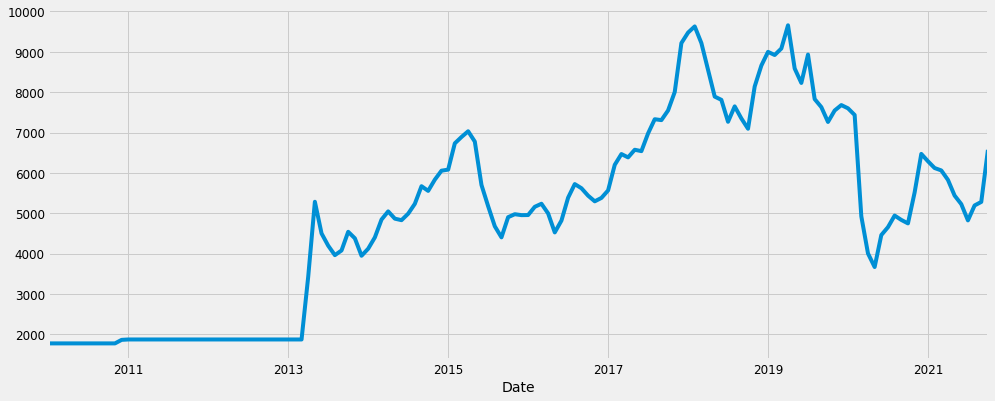

In [10]:
y.plot(figsize=(15, 6))
plt.show()

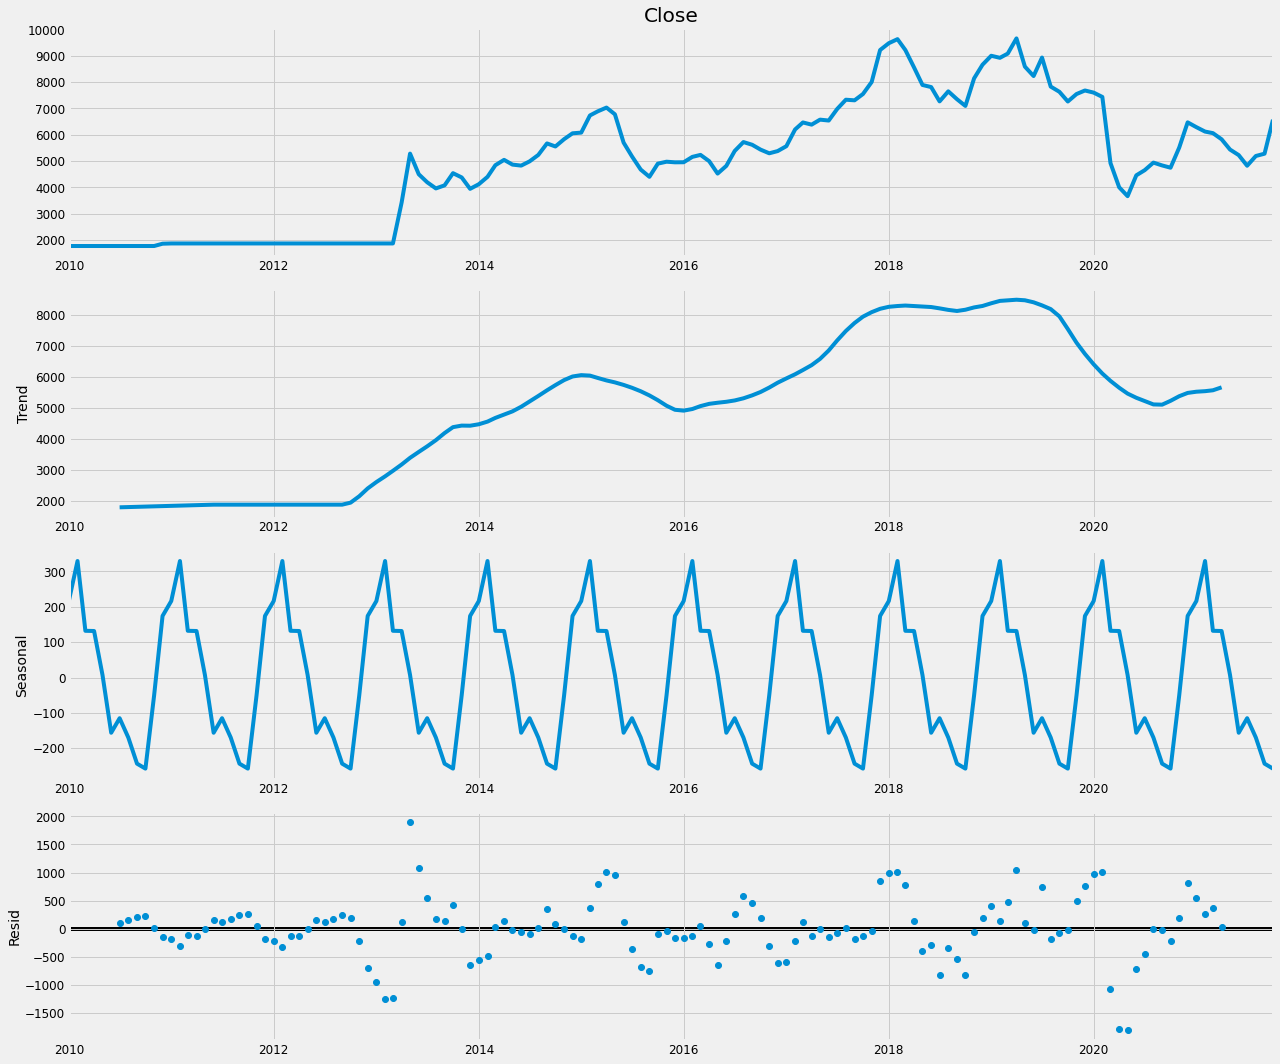

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [14]:
import pmdarima as pm
Data = pm.auto_arima(y,trace=1,Seasonal=False,max_p=2,max_q=2,
                     error_action='ignore',Stepwise=False)
print(Data.summary())
results = Data.fit(y)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2138.300, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2145.175, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2136.422, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2135.523, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2143.882, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2137.507, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2137.431, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2133.942, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2135.990, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2135.915, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2134.875, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2136.770, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.702 seconds
                           

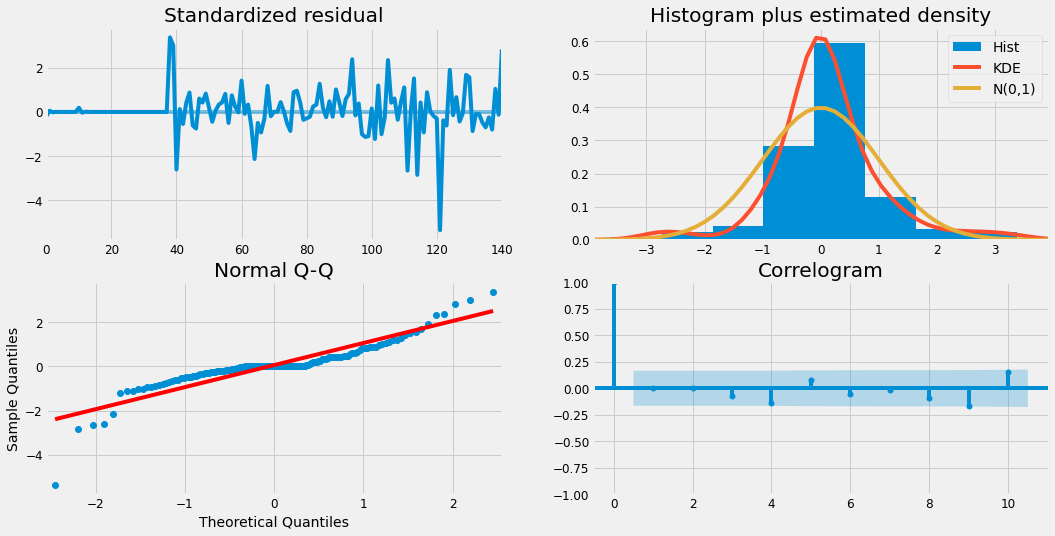

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

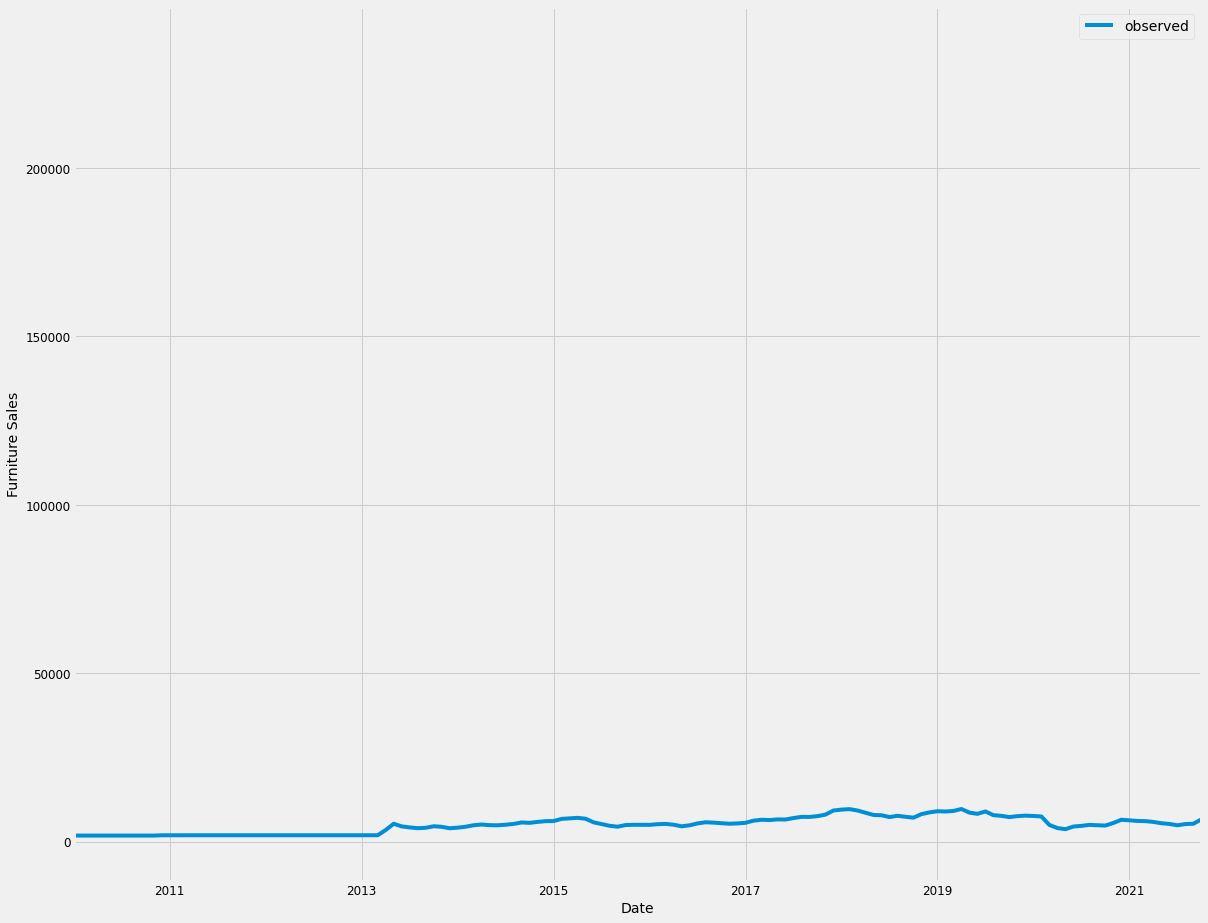

In [26]:
pred = pd.DataFrame(Data.predict_in_sample(y))
pred_ci = pd.DataFrame(results.conf_int())
ax = y['2010':].plot(label='observed')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

AttributeError: 'DataFrame' object has no attribute 'predicted_mean'

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
pred_uc = Data.predict(n_periods=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7), ylim=(0,15000))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'conf_int'

In [ ]:
inf_irfs = results1.forecast(steps=100)

print(inf_irfs)


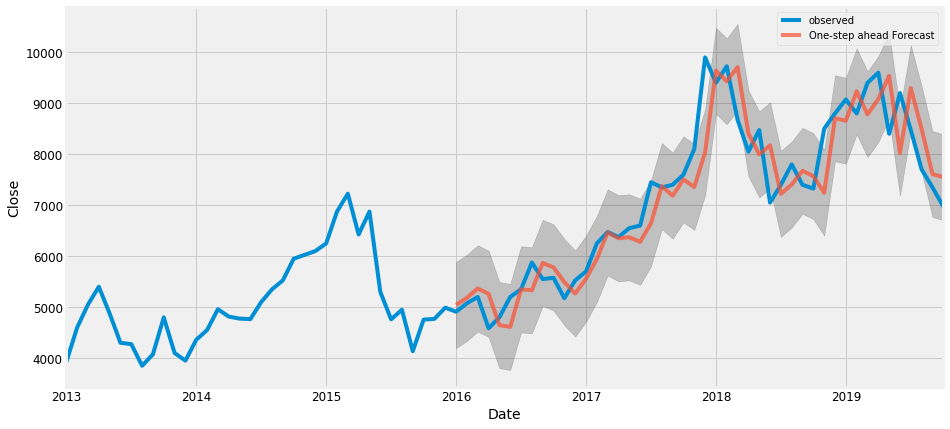

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = array['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()